In [5]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import pynbody as pb
import astropy.units as u

import KeplerOrbit as ko

In [6]:
snap1 = pb.load ('../asteroid.9990000')
snap = ko.orb_params(snap1)


/usr/local/anaconda3/lib/python3.7/site-packages/pynbody/snapshot/tipsy.py:130: RuntimeWarning: No readable param file in the run directory or parent directory: using defaults.
  "No readable param file in the run directory or parent directory: using defaults.", RuntimeWarning)


In [7]:
snap.properties['time'].in_units('yr')


7824812355592.26

In [8]:
a = snap['a']
e = snap['e']


In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
x = np.linspace(0, 1, 400) #how do i make the xy smaller axis
y = np.sin(x ** 2)

In [11]:
snap1= pb.load('../asteroid.3000000')
snap0= pb.load('asteroids_low_wide.ic')
snap1 = ko.orb_params(snap1)
snap0 = ko.orb_params(snap0)



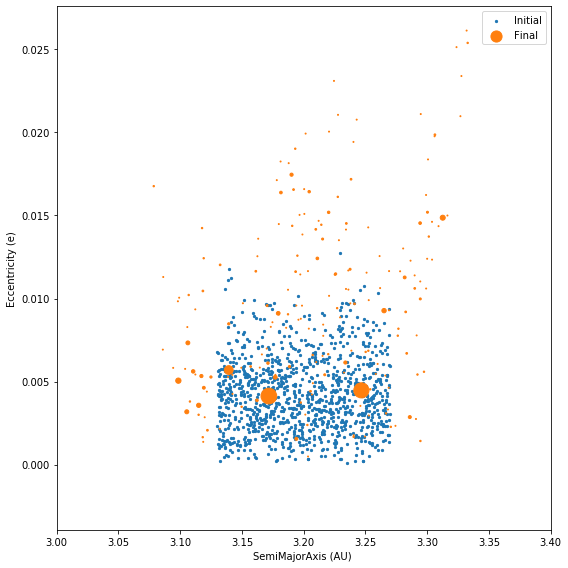

In [12]:
fig, (ax1) = plt.subplots(1, figsize= (8,8), sharey = True , sharex = True)
#fig.suptitle('Asteroids Low_wide Resolution Planetestimals')
ax1.scatter(snap0['a'], snap0['e'], s = 5, label ='Initial')
ax1.scatter(snap1['a'], snap1['e'], s = snap1['mass']/np.min(snap0['mass']), label = 'Final' )


#ax1.set_ylim(0,0.03)
ax1.set_xlim(3.0,3.4)
ax1.set_xlabel('SemiMajorAxis (AU) ')
ax1.set_ylabel('Eccentricity (e)')

xerror= 0.1
ax1.legend()
plt.tight_layout()
#talk about variing sizes of planetestimals and how it is larger toward the bottom.

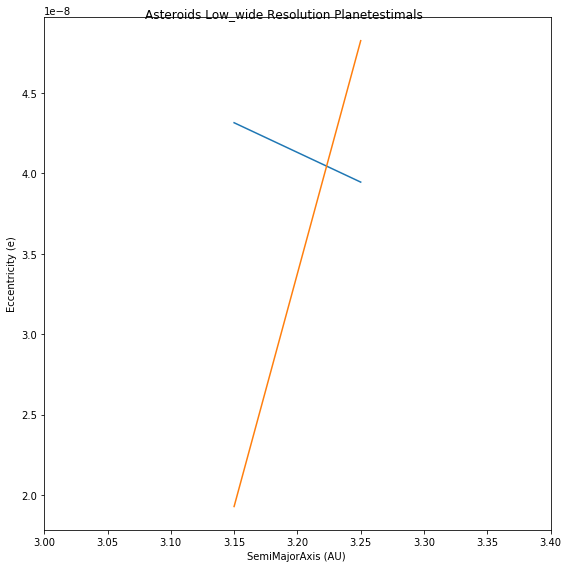

In [13]:
p = pb.analysis.profile.Profile(snap0.d, nbins=2, min=3.1, max=3.3 )
p1 = pb.analysis.profile.Profile(snap1.d, nbins=2, min=3.1, max=3.3)
fig, (ax1) = plt.subplots(1, figsize= (8,8), sharey = True , sharex = True)
fig.suptitle('Asteroids Low_wide Resolution Planetestimals')
ax1.plot(p['rbins'], p['density'])
ax1.plot(p1['rbins'], p1['density'])
#ax1.set_ylim(0,0.03)
ax1.set_xlim(3.0,3.4)
ax1.set_xlabel('SemiMajorAxis (AU) ')
ax1.set_ylabel('Eccentricity (e)')

xerror= 0.1

plt.tight_layout()

Text(0, 0.5, 'N(<M)')

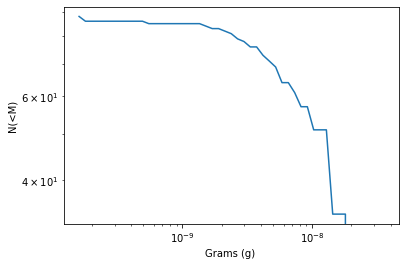

In [14]:
logbins = np.logspace(np.log10(np.min(snap1['mass'])) , np.log10(np.max(snap1['mass'])))
hist, bins = np.histogram(snap1['mass'] , bins = logbins)
bins = (0.5 * (bins[1:] + bins[:-1]))*u.solMass
plt.plot(bins,np.cumsum(hist)[::-1])
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Grams (g) ')
plt.ylabel('N(<M)')


#on the right 2, this shows Oligaric growth
#I changed the hist to make it reverse
#not sure what this error is about

Text(0, 0.5, 'N(<M)')

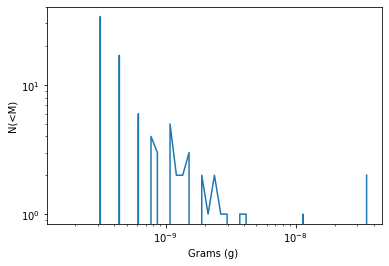

In [15]:
logbins = np.logspace(np.log10(np.min(snap1['mass'])) , np.log10(np.max(snap1['mass'])))
hist, bins = np.histogram(snap1['mass'] , bins = logbins)
bins = (0.5 * (bins[1:] + bins[:-1]))*u.solMass
plt.plot(bins,hist)
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Grams (g) ')
plt.ylabel('N(<M)')
